**Text Recognition (STR) system in unstructured environments using OCR(Optical Character Recognition)**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
dataset_path = '/content/drive/MyDrive/img'

In [3]:
import os

print("Files found:", os.listdir(dataset_path)[:5])  # Show first 5 files


Files found: ['02_04.jpg', '01_06.jpg', '01_13.jpg', '01_10.jpg', '00_06.jpg']


In [4]:
!pip install easyocr opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [5]:
import easyocr
reader = easyocr.Reader(['en'], gpu=False)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [6]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def detect_text(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image at {image_path} not found.")
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = reader.readtext(img_rgb)

    plt.figure(figsize=(12, 8))
    plt.imshow(img_rgb)
    ax = plt.gca()

    for (bbox, text, prob) in results:
        (tl, tr, br, bl) = bbox
        tl = tuple(map(int, tl))
        width = int(tr[0] - tl[0])
        height = int(bl[1] - tl[1])
        ax.add_patch(Rectangle(tl, width, height, fill=False, color='red', linewidth=2))
        plt.text(tl[0], tl[1] - 10, f'{text} ({prob:.2f})', color='blue', fontsize=12)

    plt.axis('off')
    plt.title("Detected Text")
    plt.show()

Total Images Found: 350


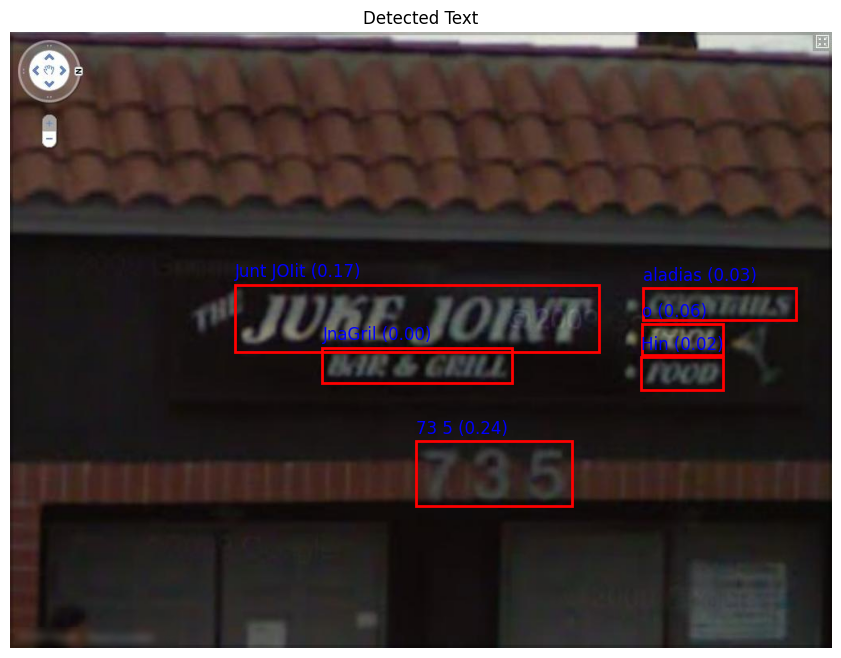

In [8]:
import glob

image_paths = sorted(glob.glob(dataset_path + '/*.*'))

if len(image_paths) == 0:
    print("No image files found in the directory.")
else:
    print("Total Images Found:", len(image_paths))

    detect_text(image_paths[3])

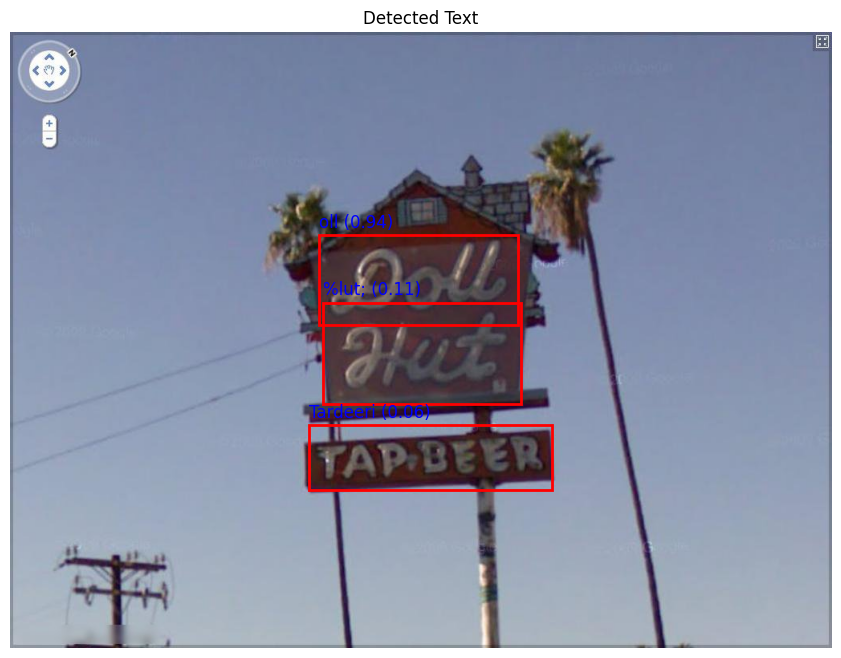

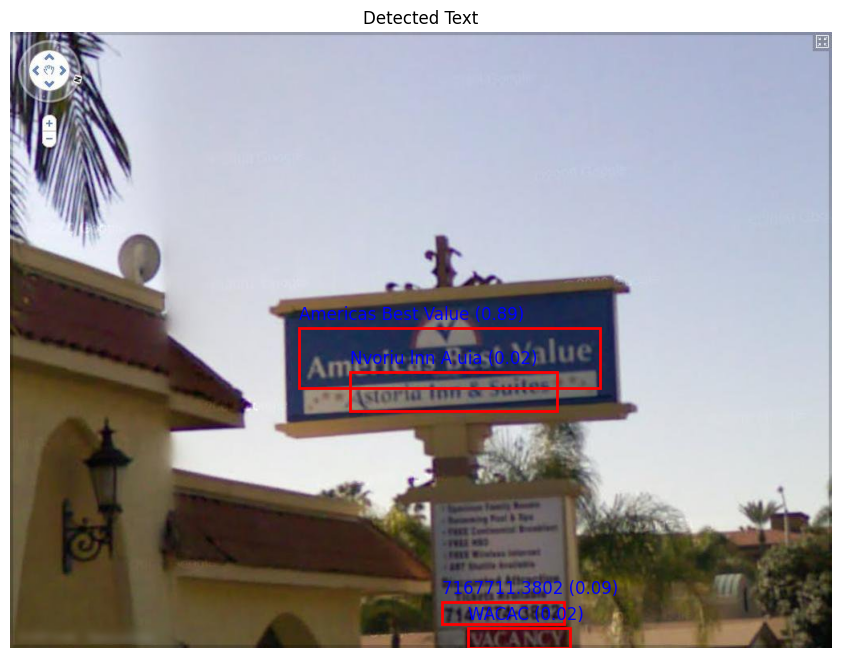

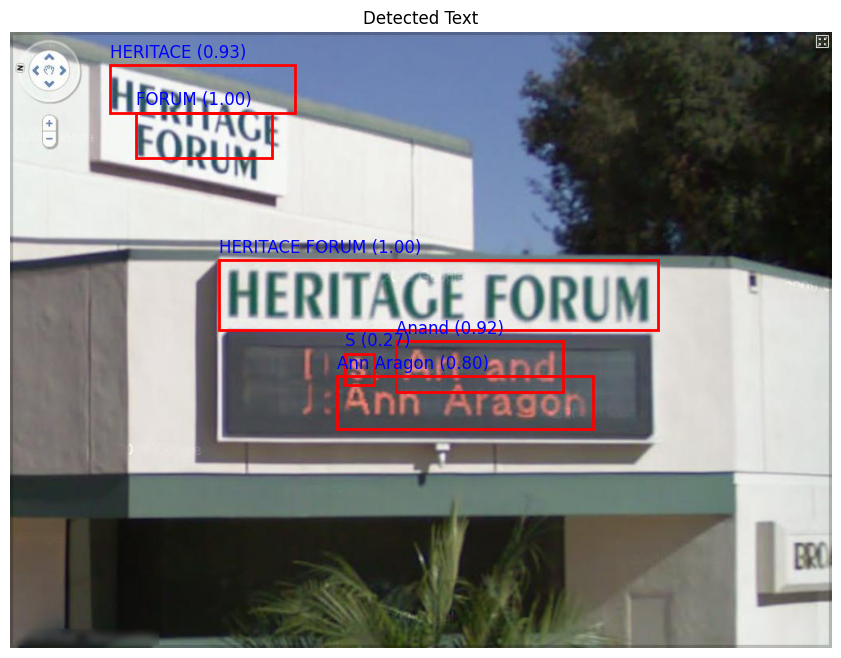

In [9]:
for path in image_paths[:3]:  # we can set for how many images we want
    detect_text(path)
